# DMPs and DMRs

In [1]:
from pylluminator.samples import Samples
from pylluminator.visualizations import dmr_manhattan_plot, dmp_heatmap, visualize_gene, show_chromosome_legend
from pylluminator.dm import DM
from pylluminator.utils import save_object

from pylluminator.utils import set_logger

set_logger('WARNING')  # set the verbosity level, can be DEBUG, INFO, WARNING, ERROR

## Load pylluminator Samples

We assume that you have already processed the .idat files according to your preferences and saved them. If not, please refer to notebook `1 - Read data and get beta values` before going any further.

In [2]:
my_samples = Samples.load('preprocessed_samples')

Here, we want to filter out the probes on the X or Y chromosomes.

In [3]:
my_samples.mask_xy_probes()

To speed up the demo, we will only calculate DMPs and DMRs on 10% of the probes

In [4]:
ten_pct_probes = int(0.1 * my_samples.nb_probes)
probe_ids = my_samples.probe_ids[:ten_pct_probes]
print(f'Selected {ten_pct_probes:,} first probes')

Selected 93,768 first probes


## Differentially Methylated Probes

The second parameter needed to create a DM object (here `~ sample_type`) is a R-like formula that describes the model, and is used to create the design matrix. You can use one or more predictors in the formula, e.g. `~age + sex`. The predictors names must be the column names of the sample sheet.

More info on  design matrices and formulas:
- https://www.statsmodels.org/devel/gettingstarted.html
- https://patsy.readthedocs.io/en/latest/overview.html


In [5]:
my_samples.sample_sheet

sample_id  sample_name sample_type
0  GSM7698459   PREC_500_3        PREC
1  GSM7698462  LNCAP_500_3       LNCAP
2  GSM7698435   PREC_500_1        PREC
3  GSM7698443   PREC_500_2        PREC
4  GSM7698438  LNCAP_500_1       LNCAP
5  GSM7698446  LNCAP_500_2       LNCAP

In [6]:
my_dms = DM(my_samples, '~ sample_type', probe_ids=probe_ids)

You can now plot the results, for the 25 most variable probes:

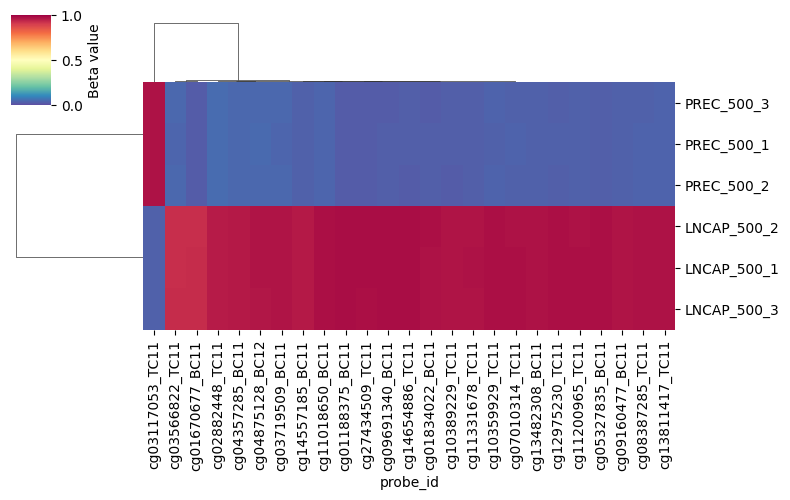

In [7]:
dmp_heatmap(my_dms, my_dms.contrasts[0], nb_probes=25, figsize=(8, 5))

## Differentially Methylated Regions

We can then identify ths DMRs by grouping neighboring probes with similar methylation patterns for a given predictor contrast. Similarity is calculated based on the Euclidean distance between probes’ beta values.

In [8]:
my_dms.compute_dmr(my_dms.contrasts)
save_object(my_dms, 'dms')

In [9]:
# get top DMRs and their associated genes for the first contrast, PREC
my_dms.get_top('DMR', my_dms.contrasts[0])

genes
segment_id sample_type[T.PREC]_p_value_adjusted chromosome                                                   
42291      3.007981e-61                         20                                                       ISM1
13864      1.671266e-58                         6                              ZNRD1ASP;HLA-J;ENSG00000237669
8774       1.238389e-56                         3                                     LINC01391;FOXL2NB;FOXL2
11768      7.087966e-54                         5                                       PDE4D;ENSG00000247345
24684      4.948102e-52                         11                                            ADM;ADM-DT;SBF2
13807      6.357316e-51                         6                                                      OR2I1P
26199      5.690177e-49                         11                                          PIWIL4-AS1;AMOTL1
20378      2.439814e-48                         9                                                    GNE;CLTA
16618      1.294469e-47                         7           HOXA11;ENSG00000278020;ENSG00000276496;ENSG000...
28614      3.695635e-46                         12                                                     DNAH10

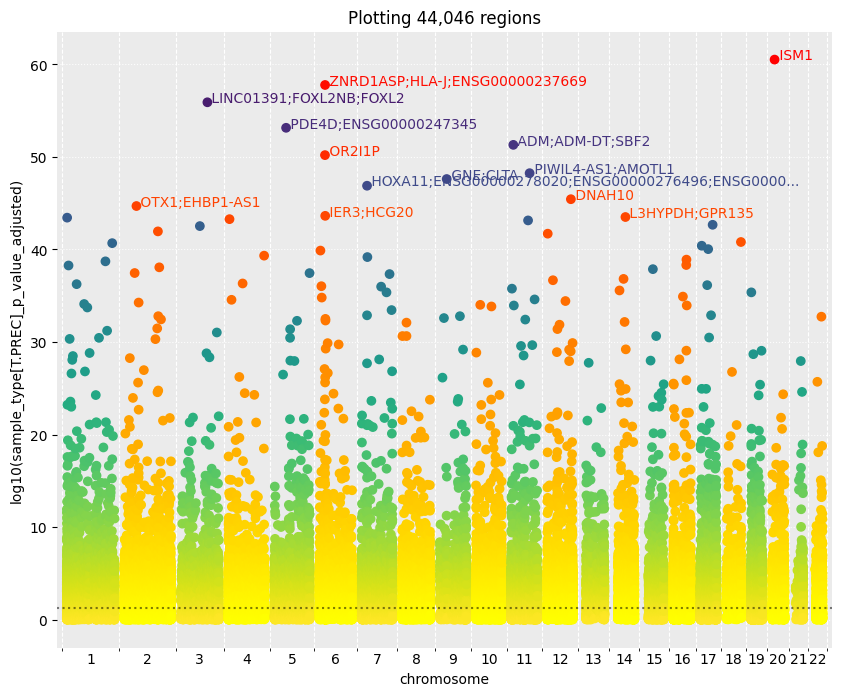

In [10]:
# visualize the DMRs for the first contrast
dmr_manhattan_plot(my_dms, my_dms.contrasts[0])

## Gene visualization

We can then have a look at a particular gene identified as differentially methylated, for example the first one, ISM1. The heatmap of the beta values of the probes associated to this gene shows a clear methylation difference between the healthy cells (PrEC) and the prostate cancer cells (LNCAP).

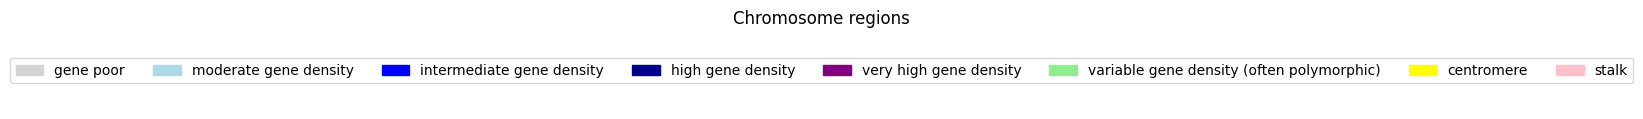

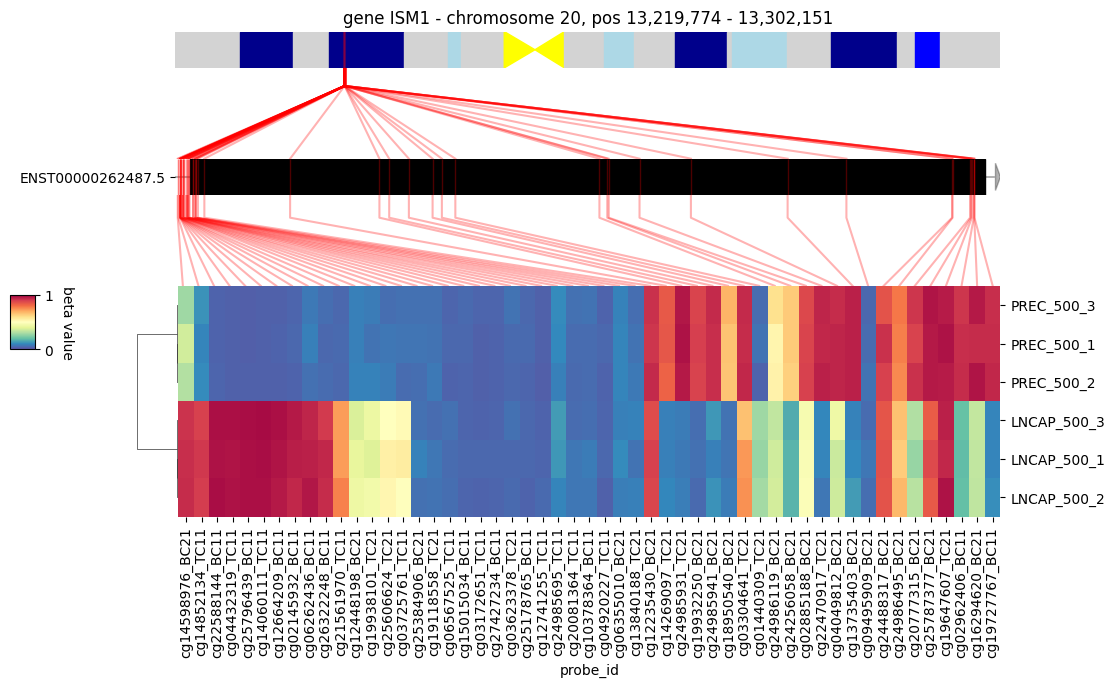

In [11]:
show_chromosome_legend()  # display the legend for chromosome regions colors, corresponding to Giemsa staining
visualize_gene(my_samples, 'ISM1', figsize=(10, 5))